### okt형태소 분석-> FreqDist 빈도 그래프re

### -  2020_ 블로그  / stopwords 통합

# 빈도 분석

## 01. okt 형태소 분석기 사용

In [1]:
import pandas as pd
data = pd.read_excel('2020blogre.xlsx') # 2020_블로그_쌀 전처리완료 파일

In [3]:
# contents str로 처리
q= " "
for i in range(len(data)):
    try:
     q += data['content'][i]
    except:
     pass

In [2]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
nouns=okt.normalize(q)

In [5]:
# 토큰화
nouns = okt.nouns(nouns)

In [7]:
# 원본 저장
nouns1= nouns
nouns2 =nouns

In [6]:
# stopwords로 제거
stopwords  = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', '말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용', '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생', '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥', '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥']

In [25]:
# 데이터 정제
for anoun in nouns2:
    #if anoun in stopwords:
    #  nouns2.remove(anoun)

    if anoun =='아가' :
      nouns2.remove(anoun)
      nouns2.append('아이')
    
    if anoun =='아기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun =='애기':
      nouns2.remove(anoun)
      nouns2.append('아이')

    if anoun == '베이':
      nouns2.remove(anoun)
      nouns2.append('베이킹')
    
    if anoun =='박력':
      nouns2.remove(anoun)
      nouns2.append('박력분')

In [26]:
# 벌레 데이터 정제
for anoun in nouns2:
    if anoun =='벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌래' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='쌀벌레' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

    if anoun =='바구미' :
        nouns2.remove(anoun)
        nouns2.append('벌레')

In [27]:
#유통기한
for anoun in nouns2:
    if anoun =='기한' :
        nouns2.remove(anoun)
        nouns2.append('유통기한')

In [28]:
#배송관련
for anoun in nouns2:
    if anoun =='배송' :
        nouns2.remove(anoun)
        nouns2.append('배달')
    if anoun =='택배' :
        nouns2.remove(anoun)
        nouns2.append('배달')

In [12]:
from collections import Counter

In [29]:
nouns2_copy = nouns2 # 중간저장 실행시간때문
count = Counter(nouns2_copy)

# remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter(
    {x: count[x] for x in count if x not in stopwords})

# print(remove_char_counter) # 데이터 확인

In [30]:
#nouns_count top300 엑셀로 저장
nc300=pd.DataFrame(remove_char_counter.most_common(300))
nc300.to_excel("naverblog2020_new2.xlsx")
nc300

,0,1
0,밥,13760
1,맛,12908
2,가루,11064
3,이유식,9806
4,아이,9603
...,...,...
295,잔,650
296,활용,648
297,비타민,648
298,농장,648


## 02. OKt() 선택하여 빈도분석 그래프 그리기

In [32]:
# 그래프 폰트 깨짐 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

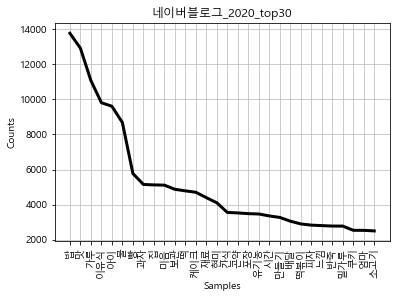

In [33]:
# top30 그래프 그리기
import nltk
from nltk.probability import FreqDist

fregra = nltk.FreqDist(remove_char_counter)
# plt.xticks(fontsize=7)
fregra.plot(30, cumulative=False, color='black',
                   title="네이버블로그_2020_top30", linewidth=3 )

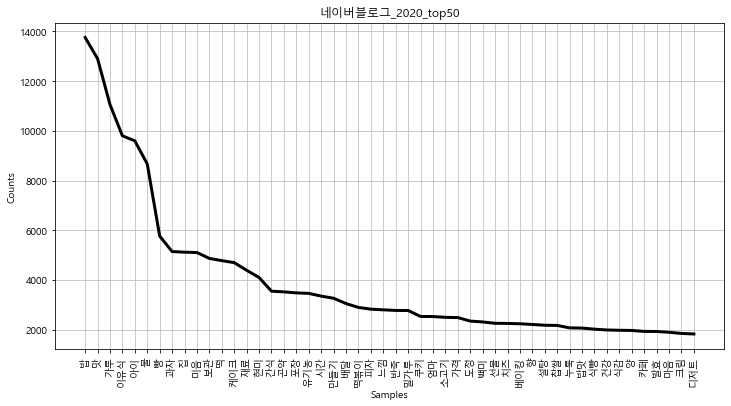

In [34]:
# top 50 그래프 그리기

fregra = nltk.FreqDist(remove_char_counter)
plt.figure(figsize=(12,6))
fregra.plot(50, cumulative=False, color='black',
            title="네이버블로그_2020_top50", linewidth=3)